In [6]:
!pip install openpyxl
!pip install fireducks

In [7]:
import fireducks.pandas as pd
from matplotlib import pyplot as plt

In [8]:
# importing zip file from the cloud directly
!wget http://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-05-31 07:35:29--  http://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [    <=>             ]  22.62M  27.9MB/s    in 0.8s    

2025-05-31 07:35:30 (27.9 MB/s) - ‘online+retail.zip’ saved [23715478]



In [9]:
# unzip the file
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [10]:
# Read excel file
df1 = pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo':'string', 'StockCode':'string', 'Description':'string', 'Country':'string'})

In [11]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
# Checking the number of rows and column
df1.shape

(541909, 8)

In [13]:
# Check datatypes
df1.info()

<class 'fireducks.pandas.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


#### Data Cleaing

In [14]:
# Handle Missing Values
df1.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,None,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,None,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,None,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,None,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,None,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,None,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,None,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,None,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,None,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [16]:
df1[df1.StockCode=='22139']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,None,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,None,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [17]:
most_freq = df1[["StockCode", "Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,DCGS0069,ebay,1
4788,DCGS0070,CAMOUFLAGE DOG COLLAR,1
4789,DCGS0073,ebay,1
4790,gift_0001_20,to push order througha s stock was,1


In [18]:
most_freq = most_freq.groupby('StockCode').head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4785,DCGS0068,ebay,1
4786,DCGS0069,OOH LA LA DOGS COLLAR,1
4788,DCGS0070,CAMOUFLAGE DOG COLLAR,1
4789,DCGS0073,ebay,1


In [19]:
most_freq.columns = ['StockCode', 'freq_Description', 'count']
df2 = df1.merge(most_freq, on='StockCode', how='left')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449


In [20]:
df2['Description'] = df2['freq_Description']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449


In [21]:
df2.isna().sum()

InvoiceNo                0
StockCode                0
Description            112
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          135080
Country                  0
freq_Description       112
count                  112
dtype: int64

In [22]:
df2.dropna(subset=['Description'], inplace=True)
df2.isnull().sum()

InvoiceNo                0
StockCode                0
Description              0
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          134968
Country                  0
freq_Description         0
count                    0
dtype: int64

In [23]:
df2.describe()

,Quantity,UnitPrice,CustomerID,count
count,541797.000000,541797.000000,406829.000000,541797.000000
mean,9.555919,4.612067,15287.690570,424.567967
std,218.103428,96.769831,1713.600303,391.068884
min,-80995.000000,-11062.060000,12346.000000,1.000000
25%,1.000000,1.250000,13953.000000,151.000000
50%,3.000000,2.080000,15152.000000,303.000000
75%,10.000000,4.130000,16791.000000,573.000000
max,80995.000000,38970.000000,18287.000000,2302.000000


In [24]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Discount,77
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,SET OF 3 COLOURED FLYING DUCKS,47
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,PLASTERS IN TIN CIRCUS PARADE,591
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,PACK OF 12 PINK PAISLEY TISSUES,219
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,PACK OF 12 BLUE PAISLEY TISSUES,156
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,ZINC T-LIGHT HOLDER STARS SMALL,278
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,Manual,571
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,VICTORIAN SEWING BOX LARGE,182
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,HANGING HEART JAR T-LIGHT HOLDER,767


In [25]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,Adjust bad debt,3
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,Adjust bad debt,3


In [26]:
# Removing Negative values
df3 = df2[(df2.Quantity> 0) & (df2.UnitPrice>0)]
df3.describe()

,Quantity,UnitPrice,CustomerID,count
count,530104.000000,530104.000000,397884.000000,530104.000000
mean,10.542037,3.907625,15294.423453,424.852891
std,155.524124,35.915681,1713.141560,389.658735
min,1.000000,0.001000,12346.000000,1.000000
25%,1.000000,1.250000,13969.000000,152.000000
50%,3.000000,2.080000,15159.000000,303.000000
75%,10.000000,4.130000,16795.000000,573.000000
max,80995.000000,13541.330000,18287.000000,2302.000000


In [27]:
df3.Quantity.quantile(0.9999)

np.float64(1439.8764000004157)

In [28]:
df3[df3.Quantity>1500].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom,ASSORTED COLOUR T-LIGHT HOLDER,126
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom,ASSORTED LAQUERED INCENSE HOLDERS,24


##### Feature Engineering: Creating New Columns

In [29]:
df4 = df3.copy()
df4['TotalSales'] = df4['Quantity'] * df4['UnitPrice']
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449,20.34


In [30]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count,TotalSales,Month
402094,571465,23343,JUMBO BAG VINTAGE CHRISTMAS,7,2011-10-17 14:29:00,2.08,14830.0,United Kingdom,JUMBO BAG VINTAGE CHRISTMAS,496,14.56,10
337174,566434,20838,FRENCH LATTICE CUSHION COVER,6,2011-09-12 15:01:00,0.85,17090.0,United Kingdom,FRENCH LATTICE CUSHION COVER,58,5.10,9
368459,568952,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,4,2011-09-29 15:29:00,3.75,14305.0,United Kingdom,FELTCRAFT PRINCESS CHARLOTTE DOLL,469,15.00,9
159497,550340,84879,ASSORTED COLOUR BIRD ORNAMENT,8,2011-04-17 15:53:00,1.69,13695.0,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,1501,13.52,4
440814,574547,23348,CHILDRENS TOY COOKING UTENSIL SET,3,2011-11-04 15:08:00,2.08,17841.0,United Kingdom,CHILDRENS TOY COOKING UTENSIL SET,181,6.24,11


#### Visualisation and EDA

##### 1. Plot Monthly Sales

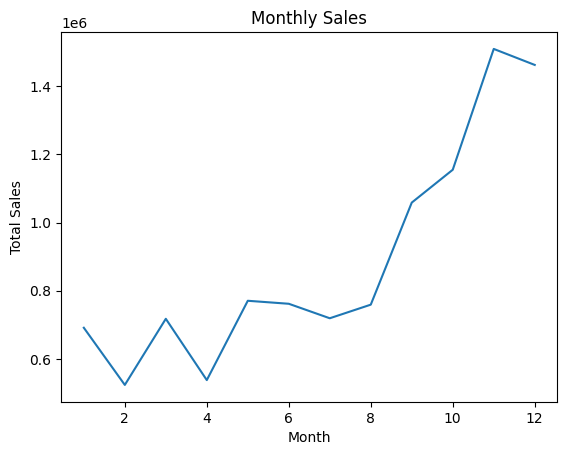

In [31]:
monthly_sales = df4.groupby('Month')['TotalSales'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

**Insights**: Total sales started rising in August, reaching a peak in November. Likely due to end of the end-of-year holiday season preparation

##### 2. Top 5 Countries

In [32]:
top_5_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)
top_5_countries

Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Name: TotalSales, dtype: float64

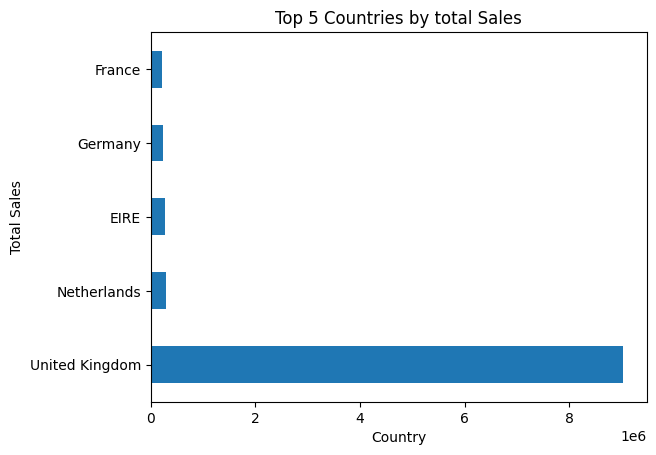

In [33]:
top_5_countries.plot(kind='barh', title='Top 5 Countries by total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

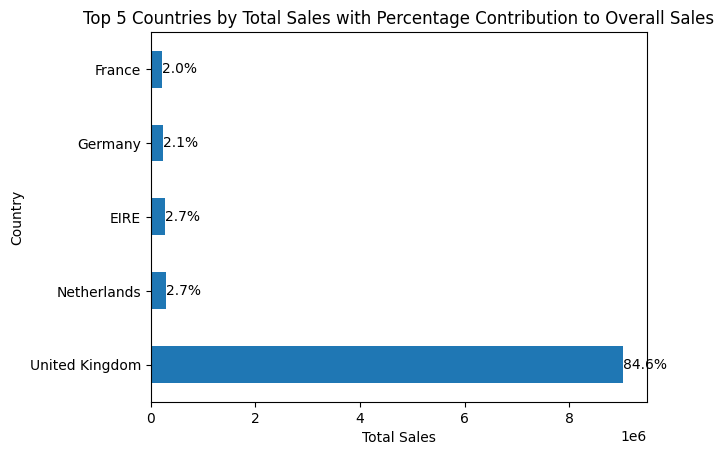

In [34]:
total_sales_overall = df4['TotalSales'].sum()  # Calculate the sum of total sales across all countries
top_5_countries_sales = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5) # Use the correctly calculated top 5 sales
percentage_contribution = (top_5_countries_sales / total_sales_overall) * 100 # Calculate percentage of overall total sales

ax = top_5_countries_sales.plot(kind='barh', title='Top 5 Countries by Total Sales with Percentage Contribution to Overall Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')

# Add percentage labels to the bars
for i in range(len(top_5_countries_sales)):
    country_name = top_5_countries_sales.index[i]
    percentage = percentage_contribution[country_name]
    # Use the value from top_5_countries_sales for positioning the text
    ax.text(top_5_countries_sales.iloc[i], i, f'{percentage:.1f}%', va='center')

plt.show()

##### 3.Product sales

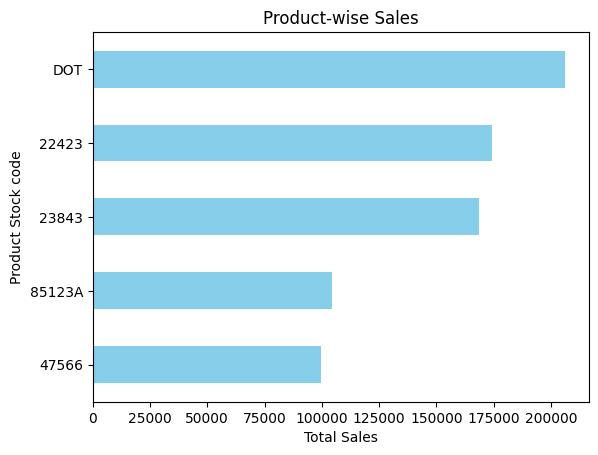

In [35]:
product_wise_sales = df4.groupby('StockCode')['TotalSales'].sum()

top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color='skyblue')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock code')
plt.gca().invert_yaxis()
plt.show()

In [36]:
product_wise_sales.sort_values(ascending=False)

StockCode
DOT       206248.770
22423     174484.740
23843     168469.600
85123A    104518.800
47566      99504.330
             ...    
90084          0.850
21268          0.840
51014c         0.830
84227          0.420
PADS           0.003
Name: TotalSales, Length: 3922, dtype: float64

In [37]:
df4[df4.StockCode=='DOT']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count,TotalSales,Month
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,DOTCOM POSTAGE,709,569.77,12
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,DOTCOM POSTAGE,709,607.49,12
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,DOTCOM POSTAGE,709,254.43,12
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,DOTCOM POSTAGE,709,121.06,12
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,DOTCOM POSTAGE,709,498.47,12
...,...,...,...,...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,DOTCOM POSTAGE,709,1008.96,12
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,DOTCOM POSTAGE,709,1683.75,12
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,DOTCOM POSTAGE,709,938.59,12
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,DOTCOM POSTAGE,709,933.17,12


In [38]:
for stock_code in top_5_products.index:
  description = df4[df4.StockCode==stock_code].Description.iloc[0]
  print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


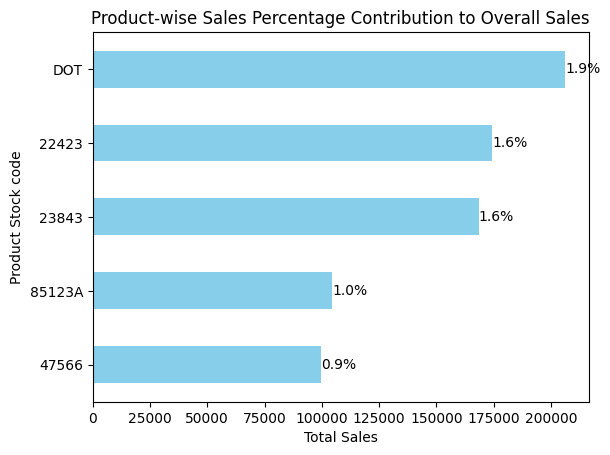

In [39]:
total_sales_overall_products = df4['TotalSales'].sum()
top_5_products_percentage = (top_5_products / total_sales_overall_products) * 100
ax = top_5_products.plot(kind='barh', color='skyblue')
plt.title('Product-wise Sales Percentage Contribution to Overall Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock code')
plt.gca().invert_yaxis()
# Add percentage labels to the bars
for i in range(len(top_5_products)):
  ax.text(top_5_products.iloc[i], i, f'{top_5_products_percentage.iloc[i]:.1f}%', va='center')
plt.show()

##### 4. RFM Analysis

In [40]:
# Most Recent date
current_dt = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
current_dt

Timestamp('2011-12-10 12:50:00')

In [41]:
rfm = df4.groupby('CustomerID').agg({'InvoiceDate': lambda x: (current_dt - x.max()).days,
                                        'InvoiceNo': 'count',
                                        'TotalSales': 'sum'})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [42]:
# Segment customers based on RFM
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=['4', '3', '2', '1'])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=['1', '2', '3', '4'])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=['1', '2', '3', '4'])

# Convert R_Segment, F_Segment, and M_Segment to integer type
rfm['R_Segment'] = rfm['R_Segment'].astype(int)
rfm['F_Segment'] = rfm['F_Segment'].astype(int)
rfm['M_Segment'] = rfm['M_Segment'].astype(int)

rfm['RFM_Score'] = rfm['R_Segment'] + rfm['F_Segment'] + rfm['M_Segment']
rfm

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,12,178.05,4,1,1,6


In [43]:
rfm.sort_values(by='RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12347.0,2,182,4310.00,4,4,4,12
12362.0,3,266,5226.23,4,4,4,12
12417.0,3,192,3649.10,4,4,4,12
12423.0,1,125,1859.31,4,4,4,12
12433.0,1,420,13375.87,4,4,4,12
...,...,...,...,...,...,...,...
18224.0,264,10,158.95,1,1,1,3
18227.0,218,5,93.75,1,1,1,3
18269.0,366,7,168.60,1,1,1,3


##### 5.Customer Churn Analysis

In [44]:
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449,20.34,12


In [45]:
# Create a bracket matrix for association rule mining
customer_last_purchase = df4.groupby('CustomerID')['InvoiceDate'].max()
customer_last_purchase.head()

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

In [46]:
customer_last_purchase = (current_dt - customer_last_purchase).dt.days
customer_last_purchase.head()

CustomerID
12346.0    325
12347.0      2
12348.0     75
12349.0     18
12350.0    310
Name: InvoiceDate, dtype: int64

In [47]:
# Define churn threshold (90 dayss without purchase)
churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head()

CustomerID
12346.0    325
12350.0    310
12353.0    204
12354.0    232
12355.0    214
Name: InvoiceDate, dtype: int64

Number of churned customers : 1449


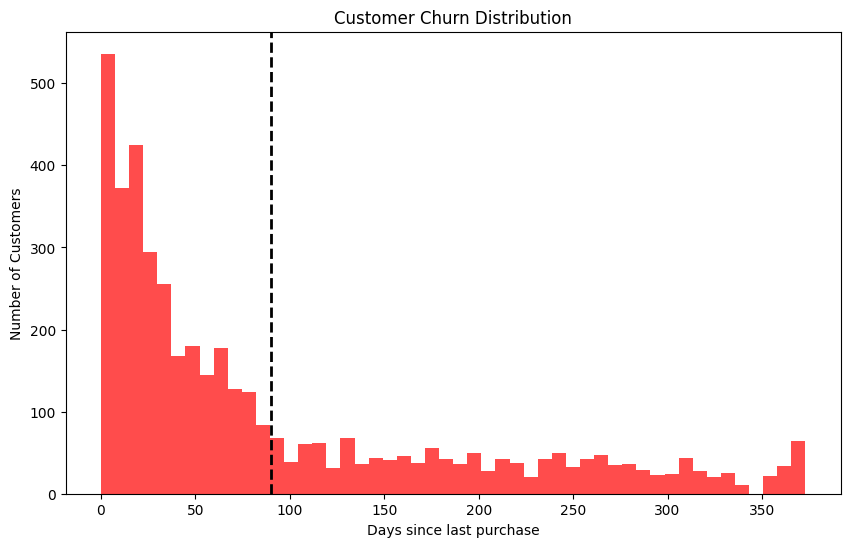

In [48]:
print('Number of churned customers :', len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.xlabel('Days since last purchase')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')
plt.show()